## 7. Insight into Machine Learning

Several more advanced applications rely on Pandas structure to work. One example is the package scikit-learn, which has become one of the dominant machine learning resource in data science. We are now going to have a very quick look at how Pandas is used in that frame.

We are going to work again with our swiss towns infos and we will see if we can predict the result of a party based on that information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

## 7.1 Data loading and features selection

We first load the data set:

In [55]:
towns = pd.read_excel('../Datasets/2018.xls', skiprows=list(range(5))+list(range(6,9)),
                      skipfooter=34, index_col='Commune',na_values=['*','X'])
towns = towns.reset_index()

Now we have to get select what featurs we are going to use to predict the vote for UDC. We have to remove the results of the other parties, as those are of course correlated.

We also create a target by selecting only the UDC column

In [56]:
features = towns.drop('PDC', axis=1)
features = features.drop('PS', axis=1)
features = features.drop('Commune', axis=1)
features = features.drop('PVL', axis=1)
features = features.drop('PLR 2)', axis=1)
features = features.drop('PBD', axis=1)
features = features.drop('PST/Sol.', axis=1)
features = features.drop('PEV/PCS', axis=1)
features = features.drop('PES', axis=1)
features = features.drop('Petits partis de droite', axis=1)
features = features.drop('Code commune', axis=1)

features = features.dropna()
targets = features['UDC']
features = features.drop('UDC', axis=1)

In [57]:
features.head()

,Habitants,Variation en %,Densité de la population par km²,Etrangers en %,0-19 ans,20-64 ans,65 ans ou plus,Taux brut de nuptialité,Taux brut de divortialité,Taux brut de natalité,...,Secteur primaire,Secteur secondaire,Secteur tertiaire,Etablissements total,Secteur primaire.1,Secteur secondaire.1,Secteur tertiaire.1,Taux de logements vacants,Nouveaux logements construits pour 1000 habitants,Taux d'aide sociale
0,1977,8.388158,249.936789,13.100658,20.586748,62.822458,16.590794,2.526529,3.031834,7.074280,...,36.0,14.0,377.0,141.0,15.0,13.0,113.0,2.581369,0.000000,0.807673
1,11900,7.294203,1123.701605,27.848740,20.285714,62.201681,17.512605,5.167740,1.440190,11.860386,...,52.0,1198.0,5101.0,951.0,24.0,130.0,797.0,1.229070,7.089170,3.442091
2,5435,5.349874,731.493943,14.149034,23.808648,60.717571,15.473781,5.389834,1.858563,10.779667,...,33.0,124.0,834.0,269.0,13.0,28.0,228.0,1.771005,1.877582,0.863688
3,3571,6.279762,262.573529,14.533744,22.738729,60.403248,16.858023,4.540295,1.986379,7.661748,...,109.0,150.0,827.0,259.0,40.0,35.0,184.0,0.858369,3.451251,1.035375
4,3687,8.123167,564.624809,14.971522,22.484405,62.110117,15.405479,7.622159,1.361100,7.349939,...,30.0,732.0,772.0,199.0,12.0,25.0,162.0,1.436602,3.005464,1.721311


In [58]:
targets.head()

0    30.929249
1    33.785785
2    29.100156
3    34.937369
4    30.114599
Name: UDC, dtype: float64

## 7.2 Splitting the data

We need to be able to test whether our ML algorithm is capable of making predictions on data is has not been trained on. We therefore split our dataset into a training and a testing set. Luckily sklearn provides this out of the box if we pass the right dataframes.

In [68]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(features, targets, 
                                        test_size = 0.2, 
                                        random_state = 42)

In [69]:
len(X_test)/len(X)

0.25

## 7.3 Choosing an ML method

Sklearn offers a wide range of ML methods. We are not entering into details here and choose a Random Forest regression:

In [70]:
from sklearn.ensemble import RandomForestRegressor

Then we instantiate the model and train it (fit):

In [72]:
random_forrest = RandomForestRegressor(n_estimators=1000)
random_forrest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Finally we can use it to make predictions. In particular we can apply it to our test sample and see how it performs:

In [73]:
predictions = random_forrest.predict(X_test)
mae = np.mean(abs(predictions - y_test))
print(mae)

7.1289715983427335


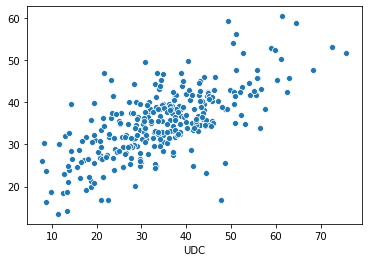

In [76]:
sns.scatterplot(x = y_test, y = predictions);

In [77]:
import scipy.stats

In [78]:
scipy.stats.pearsonr(y_test,predictions)

(0.6876921393204265, 4.619479519855622e-43)

## 7.4 Important features

A random forest classificer has the advantage that it can provide us information about how important each feature is. In other terms which features help the most in predicting:

In [79]:
print(random_forrest.feature_importances_)


[0.0157811  0.03176925 0.02832914 0.0738541  0.05928388 0.06327619
 0.02291003 0.03196873 0.02490367 0.02271926 0.02164017 0.01243678
 0.03532463 0.0245083  0.0361857  0.0296608  0.14000219 0.02845047
 0.02660776 0.02543596 0.01221539 0.02794163 0.01707762 0.01417894
 0.00943776 0.05695948 0.01009704 0.0135473  0.03325941 0.01637723
 0.03386008]


The larger the number, the better its predictions power. We can sort this list and see to what features they correspond in our feature Dataframe:

In [80]:
features.keys()[np.argsort(random_forrest.feature_importances_)]

Index(['Etablissements total', 'Secteur secondaire.1', 'Emplois total',
       'Ménages privés', 'Secteur tertiaire.1', 'Secteur tertiaire',
       'Habitants', 'Nouveaux logements construits pour 1000 habitants',
       'Secteur secondaire', 'Taux brut de mortalité', 'Taux brut de natalité',
       '65 ans ou plus', 'Surface totale en km²', 'Taux brut de divortialité',
       'Surface improductive en %', 'Surface boisée en %', 'Secteur primaire',
       'Densité de la population par km²', 'Variation en ha.1',
       'Variation en ha', 'Variation en %', 'Taux brut de nuptialité',
       'Taux de logements vacants', 'Taux d'aide sociale',
       'Taille moyenne des ménages en personnes',
       'Surfaces d'habitat et d'infrastructure en %', 'Secteur primaire.1',
       '0-19 ans', '20-64 ans', 'Etrangers en %', 'Surface agricole en %'],
      dtype='object')

Finally, we can have a look at the actual correlations that seem to be indicated here. For this we select a few features and create a long format table for plotting:

In [81]:
towns_melt = pd.melt(towns, id_vars=['Commune','UDC'],
        value_vars=['Etrangers en %','Surface agricole en %','Taux brut de mortalité'])

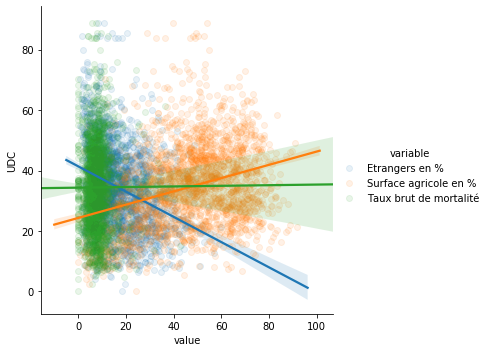

In [83]:
sns.lmplot(data = towns_melt, x = 'value', y = 'UDC', hue = 'variable', scatter_kws={'alpha' : 0.1});

There are indeed strong correlations where they are expected! Notice alos that we can learn things here: the right-wing party is most successful where there's the least foreigners... 